In [13]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.manifold import TSNE
import umap
import numpy as np

df = pd.read_csv('Income Survey Dataset.csv')
df['Total_income'].fillna(df['Total_income'].median(), inplace=True)
df['LOG income band'] = np.floor(np.log10(df['Total_income']))

label_column = 'LOG income band'  # Update this to the correct column name in your dataset
X = df.drop(columns=['Total_income', 'Self_emp_income', 'Guaranteed_income', 'income_after_tax', 'LOG income band'])

/var/folders/78/cb8tbsx934xgcgbh7943dnd80000gn/T/ipykernel_51942/4172131217.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Total_income'].fillna(df['Total_income'].median(), inplace=True)
/Users/shin/umap_testing/pythonProject1/.venv/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [15]:
df = df.dropna(subset=['LOG income band'])

[4. 5. 5. ... 5. 5. 4.]


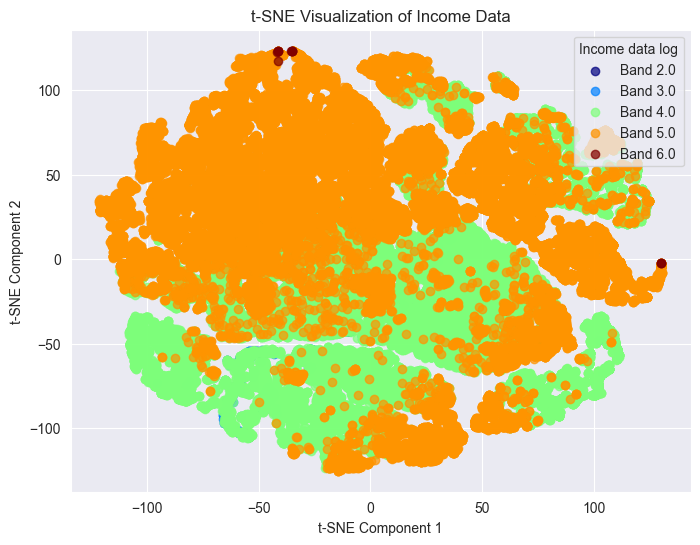

In [20]:
labels = df[label_column].values  # Extract labels
X = pd.get_dummies(X)
# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_embedded = tsne.fit_transform(X)

# Define unique labels and color mapping
unique_labels = np.unique(labels)
colors = plt.cm.jet(np.linspace(0, 1, len(unique_labels)))  # Correct color mapping
label_to_color = {label: color for label, color in zip(unique_labels, colors)}
print(labels)
# Plot t-SNE with colors based on labels
plt.figure(figsize=(8, 6))
for label in unique_labels:
    idx = labels == label  # Proper boolean indexing
    plt.scatter(X_embedded[idx, 0], X_embedded[idx, 1], color=[label_to_color[label]], label=f'Band {label}',
                alpha=0.7)

plt.legend(title="Income data log")
plt.title("t-SNE Visualization of Income Data")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()

 
# for n_neighbors in perplexities:
#     reducer = umap.UMAP(n_neighbors=n_neighbors, random_state=42)
#     embedding = reducer.fit_transform(X)
# 
#     # Approximate "cost" using distance to original high-dimensional data
#     reconstructed = reducer.inverse_transform(embedding)
#     error = np.linalg.norm(X - reconstructed)  # Euclidean distance as cost
#     costs.append(error)

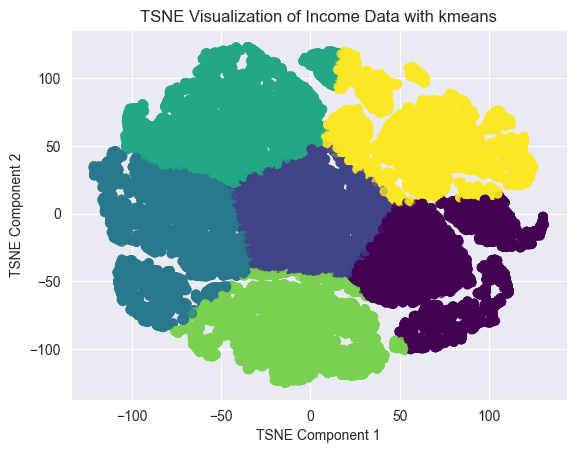

In [26]:
from sklearn.cluster import KMeans
num_clusters = 6  # Adjust based on dataset
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
plt.title("TSNE Visualization of Income Data with kmeans")
plt.xlabel("TSNE Component 1")
plt.ylabel("TSNE Component 2")
cluster_labels = kmeans.fit_predict(X_embedded)
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=cluster_labels, cmap="viridis", alpha=0.7)

/Users/shin/umap_testing/pythonProject1/.venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shin/umap_testing/pythonProject1/.venv/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


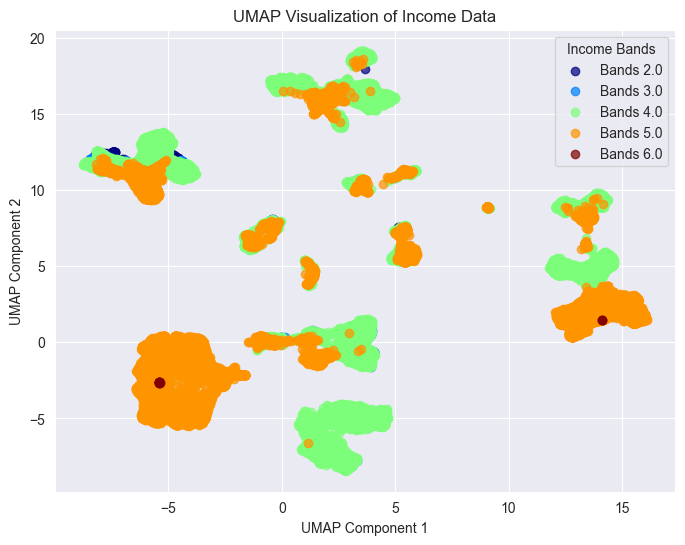

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer

# Handle missing values using KNN Imputer
imputer = KNNImputer(n_neighbors=5)  # Adjust `n_neighbors` based on your dataset
df_imputed = imputer.fit_transform(pd.get_dummies(df))  # Encode categorical features

# Scale the data
scaled_dia_data = StandardScaler().fit_transform(df_imputed)

# Apply UMAP for dimensionality reduction
reducer = umap.UMAP(n_neighbors=100, random_state=42)
X_embedded_umap = reducer.fit_transform(scaled_dia_data)  # Store the transformed output

# Define unique labels and color mapping
unique_labels = np.unique(labels)
colors = plt.cm.jet(np.linspace(0, 1, len(unique_labels)))  # Color mapping
label_to_color = {label: color for label, color in zip(unique_labels, colors)}

plt.figure(figsize=(8, 6))
for label in unique_labels:
    idx = labels == label  # Proper boolean indexing
    plt.scatter(X_embedded_umap[idx, 0], X_embedded_umap[idx, 1], color=[label_to_color[label]], label=f'Bands {label}', alpha=0.7)

plt.legend(title="Income Bands")
plt.title("UMAP Visualization of Income Data")
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.show()

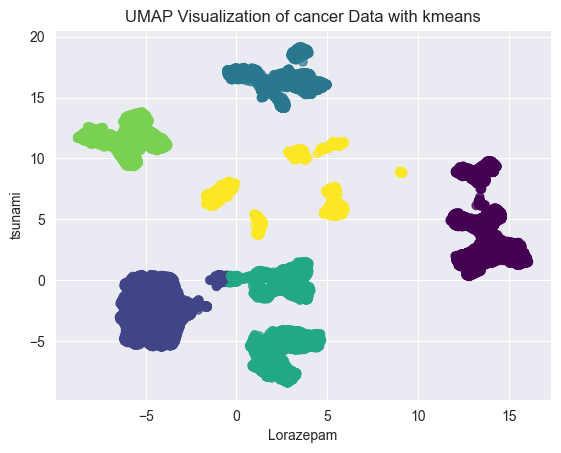

In [29]:
from sklearn.cluster import KMeans
num_clusters = 6  # Adjust based on dataset
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
plt.title("UMAP Visualization of cancer Data with kmeans")
plt.xlabel("Lorazepam")
plt.ylabel("tsunami")
cluster_labels = kmeans.fit_predict(X_embedded_umap)
plt.scatter(X_embedded_umap[:, 0], X_embedded_umap[:, 1], c=cluster_labels, cmap="viridis", alpha=0.7)

In [16]:
perplexities = np.arange(5, 51, 5)  # Analogous to perplexity in t-SNE
costs = []